# Data exploration

This notebook is used to explore data from sources

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the path
sys.path.insert(0, os.path.abspath('..'))

# Import the forecaster
from utils.gdp_forecaster import GDPForecaster
from utils.data_collector import DataCollector

# Set up Matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

/Users/ignasipascual/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Initialize the Forecaster

First, let's initialize the GDP forecaster and list the available countries.

In [2]:
# Create a data collector instance
data_collector = DataCollector()

# Get the list of available countries
countries = data_collector.get_country_list()

# Display the first 10 countries
pd.DataFrame(countries).head(10)

,name,id,iso3code
0,Aruba,ABW,AW
1,Afghanistan,AFG,AF
2,Angola,AGO,AO
3,Albania,ALB,AL
4,Andorra,AND,AD
5,United Arab Emirates,ARE,AE
6,Argentina,ARG,AR
7,Armenia,ARM,AM
8,American Samoa,ASM,AS
9,Antigua and Barbuda,ATG,AG


## 2. Select a Country and Load Data

Now, let's select a country and load its historical economic data.

In [3]:
# Initialize the forecaster
forecaster = GDPForecaster()

# Select a country (you can change this to any available country code)
COUNTRY_CODE = "USA"

# Load historical data
historical_data = forecaster.load_data(COUNTRY_CODE)

# Display the first few rows
historical_data.tail()

2025-03-13 17:46:08,559 - data_collector - INFO - Fetching World Bank data for USA


,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,SP.POP.TOTL,SI.POV.GINI,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,BX.KLT.DINV.WD.GD.ZS,GC.DOD.TOTL.GD.ZS,SL.UEM.TOTL.ZS,FP.CPI.TOTL.ZG,GB.XPD.RSDV.GD.ZS,SH.XPD.CHEX.GD.ZS,SE.XPD.TOTL.GD.ZS,EG.USE.PCAP.KG.OE,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NV.AGR.TOTL.ZS
year,,,,,,,,,,,,,,,,,
2019-01-01,2.153998e+13,2.583825,328329953,41.5,11.789197,14.469283,1.466965,100.032349,3.669,1.812210,3.17049,16.665806,4.95747,NaN,18.145484,76.611371,0.832621
2020-01-01,2.135410e+13,-2.163029,331526933,39.7,10.073656,13.006122,0.641872,124.550891,8.055,1.233584,3.46777,18.756220,5.39998,NaN,17.267677,77.063050,0.935800
2021-01-01,2.368117e+13,6.055053,332048977,39.7,10.790978,14.422678,2.009212,118.450756,5.349,4.697859,3.45705,17.362568,5.42830,NaN,17.608172,76.399594,0.944733
2022-01-01,2.600689e+13,2.512375,333271411,41.3,11.602228,15.289462,1.572591,112.889633,3.650,8.002800,NaN,16.571152,NaN,NaN,NaN,NaN,NaN
2023-01-01,2.772071e+13,2.887556,334914895,NaN,11.011511,13.887852,1.258207,114.877163,3.638,4.116338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Explore Historical GDP Data

Let's visualize the historical GDP data to understand past trends.

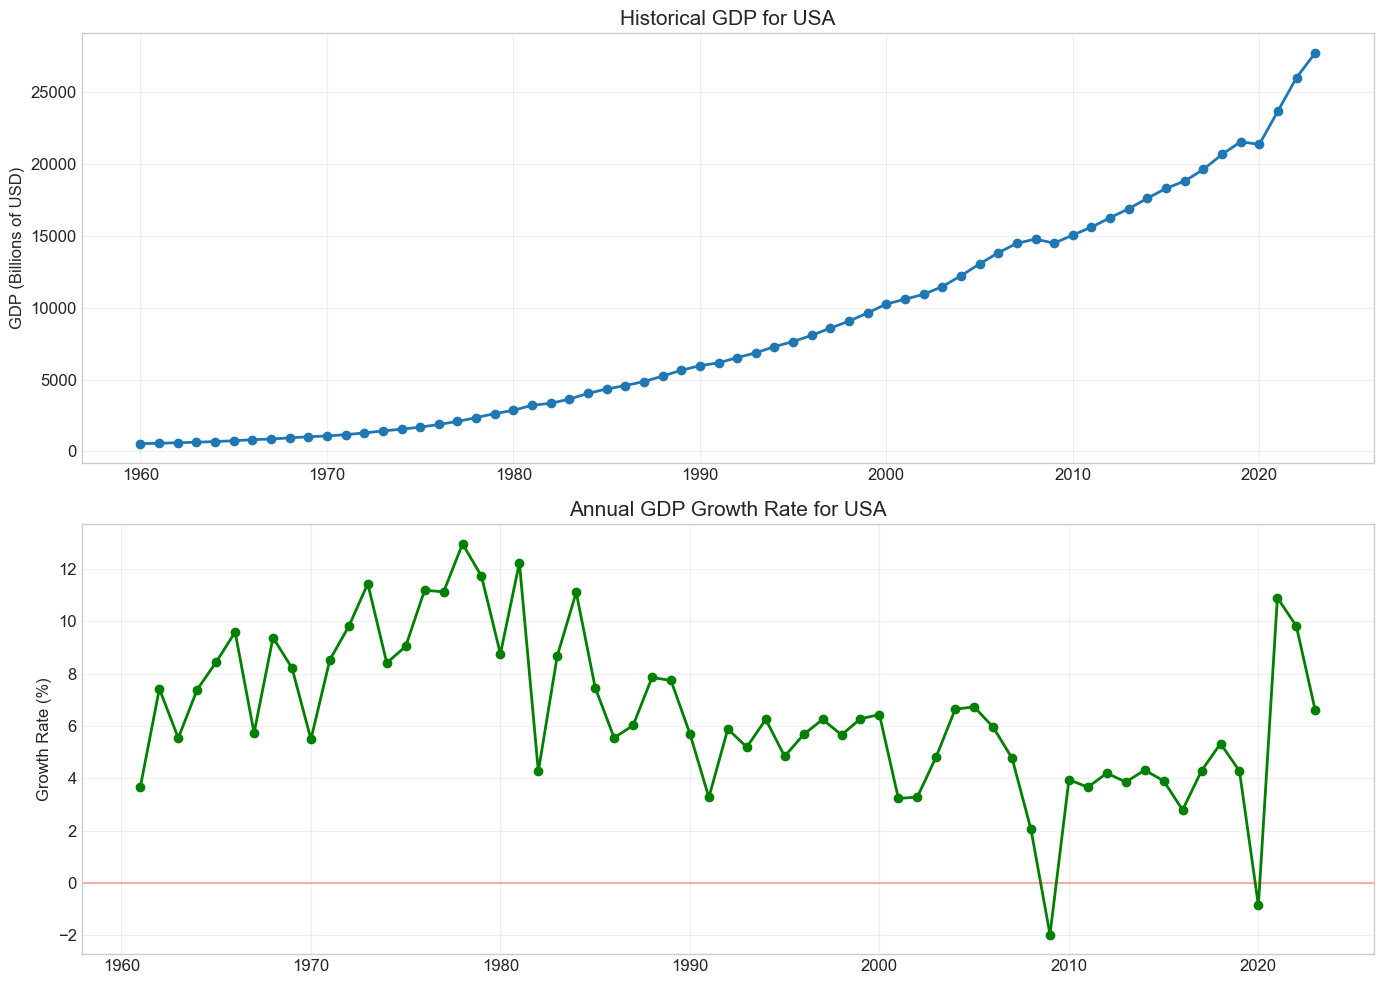

In [4]:
# Extract GDP data
gdp_data = historical_data['NY.GDP.MKTP.CD'].dropna()

# Calculate annual growth rate
gdp_growth = gdp_data.pct_change() * 100

# Plot historical GDP
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# GDP values
ax1.plot(gdp_data.index, gdp_data.values / 1e9, 'o-', linewidth=2)
ax1.set_title(f"Historical GDP for {COUNTRY_CODE}", fontsize=15)
ax1.set_ylabel("GDP (Billions of USD)", fontsize=12)
ax1.grid(True, alpha=0.3)

# GDP growth rate
ax2.plot(gdp_growth.index, gdp_growth.values, 'o-', linewidth=2, color='green')
ax2.set_title(f"Annual GDP Growth Rate for {COUNTRY_CODE}", fontsize=15)
ax2.set_ylabel("Growth Rate (%)", fontsize=12)
ax2.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Analyze Key Economic Indicators

Let's explore some of the key economic indicators that will be used as features in our model.

In [5]:
# Select key indicators
key_indicators = [
    'NY.GDP.MKTP.CD',  # GDP
    'SP.POP.TOTL',     # Population
    'SI.POV.GINI',     # Gini index
    'SL.UEM.TOTL.ZS',  # Unemployment
    'FP.CPI.TOTL.ZG'   # Inflation
]

# Filter the data
indicators_data = historical_data[key_indicators].copy()

# Show
indicators_data


,NY.GDP.MKTP.CD,SP.POP.TOTL,SI.POV.GINI,SL.UEM.TOTL.ZS,FP.CPI.TOTL.ZG
year,,,,,
1960-01-01,5.419886e+11,180671000,NaN,NaN,1.457976
1961-01-01,5.619403e+11,183691000,NaN,NaN,1.070724
1962-01-01,6.036394e+11,186538000,NaN,NaN,1.198773
1963-01-01,6.370586e+11,189242000,37.6,NaN,1.239669
1964-01-01,6.841446e+11,191889000,38.1,NaN,1.278912
...,...,...,...,...,...
2019-01-01,2.153998e+13,328329953,41.5,3.669,1.812210
2020-01-01,2.135410e+13,331526933,39.7,8.055,1.233584
2021-01-01,2.368117e+13,332048977,39.7,5.349,4.697859
